In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10 as data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
from tensorflow.keras.layers import BatchNormalization, Dropout
import seaborn as sns;

In [2]:
import pandas as pd
#immport data
data_frame = pd.read_excel("train.xlsx")
data_frame1 = pd.read_excel("data_anysis.xlsx")
data_frame.describe()

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000,3903.000000
mean,38.984541,45.294944,52.784871,656.507337,0.225864,75.190124,3.319754,0.109481,0.015342,2553.566565,2209.062206,0.297463,0.833713,1.319754,0.428132
std,14.540574,15.546263,64.786127,717.237752,0.232311,14.008806,0.684632,0.090865,0.125137,1829.663990,1810.428997,0.572666,12.506317,0.684632,0.494871
min,7.902370,8.047619,2.562656,-8000.000000,0.000000,47.889610,3.000000,0.003690,-1.043000,0.675070,0.000000,0.000000,-600.000000,1.000000,0.000000
25%,28.642857,34.880952,43.504429,224.700000,0.030303,62.761544,3.000000,0.058475,-0.055860,948.100000,579.800000,0.000000,0.802960,1.000000,0.000000
50%,38.976190,47.023810,53.053333,413.100000,0.142857,76.677489,3.000000,0.085307,0.005701,2276.000000,1898.000000,0.000000,0.937191,1.000000,0.000000
75%,50.119048,57.345238,60.650000,834.969651,0.371429,86.821260,3.000000,0.143723,0.078966,3839.552040,3455.073327,1.000000,0.987258,1.000000,1.000000
max,75.619048,79.547619,4000.000000,4412.000000,0.966667,100.000000,6.000000,1.776212,1.208233,8410.000000,8129.000000,5.000000,500.000000,4.000000,1.000000


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler  #建構standardization的物件
name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)',
            '平均APP運作指標/小時','充電時間指標','手機電池電量','CPU跑分階級',
            '手機外殼/包膜指標','外型平均曲率','上網頻率指標','通話頻率指標','新機/二手/老舊','內容容量比率','CPU效能等級']
#name_list_outlier =['手機螢幕溫度(平均)','手機螢幕溫度(最大)','手機背蓋溫度(平均)','平均APP運作指標/小時','上網頻率指標','通話頻率指標','內容容量比率']
name_pre_outlier = ['Mobile Screen Temperature (Max)','Mobile Phone Back Cover Temperature (Average)','Average APP Operation Index/Hour','Mobile Phone Battery Level','Content Capacity Ratio']


#離群值處理
def  outlier_del(data_frame,name_list_outlier):
    for i, name in enumerate(name_list_outlier):
        print(name)
        print("Shape Of The Before Ouliers: ", data_frame[name].shape)
    
        # 计算IQR
        Q1 = np.percentile(data_frame[name], 25)
        Q3 = np.percentile(data_frame[name], 75)
        IQR = Q3 - Q1
        n = 2

        # 定义离群值范围
        lower_bound = Q1 - n * IQR
        upper_bound = Q3 + n * IQR

        # 过滤离群值
        filtered_entries = ((data_frame[name] >= lower_bound) & (data_frame[name] <= upper_bound))
        data_frame = data_frame[filtered_entries]
    
        print("Shape Of The After Ouliers: ",data_frame[name].shape)
        print('===================================================================================================================')
    return data_frame

data_frame=outlier_del(data_frame,name_list_outlier)
data_frame.describe()


手機螢幕溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機螢幕溫度(最大)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3903,)
手機背蓋溫度(平均)
Shape Of The Before Ouliers:  (3903,)
Shape Of The After Ouliers:  (3839,)
平均APP運作指標/小時
Shape Of The Before Ouliers:  (3839,)
Shape Of The After Ouliers:  (3632,)
充電時間指標
Shape Of The Before Ouliers:  (3632,)
Shape Of The After Ouliers:  (3632,)
手機電池電量
Shape Of The Before Ouliers:  (3632,)
Shape Of The After Ouliers:  (3632,)
CPU跑分階級
Shape Of The Before Ouliers:  (3632,)
Shape Of The After Ouliers:  (2952,)
手機外殼/包膜指標
Shape Of The Before Ouliers:  (2952,)
Shape Of The After Ouliers:  (2949,)
外型平均曲率
Shape Of The Before Ouliers:  (2949,)
Shape Of The After Ouliers:  (2892,)
上網頻率指標
Shape Of The Before Ouliers:  (2892,)
Shape Of The After Ouliers:  (2892,)
通話頻率指標
Shape Of The Before Ouliers:  (2892,)
Shape Of The After Ouliers:  (2892,)
新機/二手/老舊
Shape Of The Before Ouliers:  (2892,)
Shape Of The After Ouliers:  

,手機螢幕溫度(平均),手機螢幕溫度(最大),手機背蓋溫度(平均),平均APP運作指標/小時,充電時間指標,手機電池電量,CPU跑分階級,手機外殼/包膜指標,外型平均曲率,上網頻率指標,通話頻率指標,新機/二手/老舊,內容容量比率,CPU效能等級,Underclocking
count,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.0,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.000000,2771.0,2771.000000
mean,41.327929,48.192487,54.220187,573.428495,0.234997,74.767248,3.0,0.102213,0.009980,2699.908807,2339.694106,0.330206,0.892168,1.0,0.443522
std,12.201440,12.652690,11.739885,412.597872,0.236992,14.157427,0.0,0.052317,0.102983,1681.185940,1678.517468,0.550307,0.126315,0.0,0.496890
min,15.601610,16.904762,16.255404,2.806544,0.000000,47.889610,3.0,0.016377,-0.307900,11.370000,0.000000,0.000000,0.460998,1.0,0.000000
25%,31.790540,38.428571,46.933333,255.300000,0.034483,62.382756,3.0,0.059031,-0.055830,1299.505295,968.600000,0.000000,0.833479,1.0,0.000000
50%,40.452381,48.119048,54.853333,450.200000,0.162500,75.595238,3.0,0.085901,0.004436,2491.000000,2137.000000,0.000000,0.946174,1.0,0.000000
75%,50.119048,57.642857,61.511030,808.800000,0.382716,87.209427,3.0,0.143479,0.069507,3858.000000,3490.750415,1.000000,0.987878,1.0,1.000000
max,75.619048,79.547619,92.866667,2068.043920,0.966667,100.000000,3.0,0.288882,0.332365,8221.000000,7838.000000,3.000000,1.000000,1.0,1.000000


In [4]:
import pandas as pd
y_data = data_frame['Underclocking'].to_numpy()
feature_ex = ['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
#feature_ex=['手機螢幕溫度(平均)','手機背蓋溫度(平均)','平均APP運作指標/小時','充電時間指標','手機電池電量','手機外殼/包膜指標','通話頻率指標','新機/二手/老舊','CPU效能等級']
x_data = data_frame[feature_ex].to_numpy()


In [5]:

from collections import Counter
from imblearn.combine import SMOTETomek
print('Original dataset shape %s' % Counter(y_data))
smote_tomek = SMOTETomek(random_state=0)

x_data, y_data= smote_tomek.fit_resample(x_data, y_data)

print('Resampled dataset shape %s' % Counter(y_data))


Original dataset shape Counter({0: 1542, 1: 1229})
Resampled dataset shape Counter({0: 1277, 1: 1277})


In [6]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def data_normalized(data):
    min_max_scaler = MinMaxScaler()
    data_normalized = min_max_scaler.fit_transform(data)
    return data_normalized
def data_standardized(data):
    standard_scaler = StandardScaler()
    data_standardized = standard_scaler.fit_transform(data)
    return data_standardized 
x_data=data_normalized(x_data)
x_data=data_standardized(x_data)
print(x_data) 
print(y_data) 
print(x_data) 
print(y_data) 

[[ 1.47142636e+00 -9.83724269e-01 -8.23314387e-01 ...  2.12896528e+00
   2.22202980e+00  8.76126718e-01]
 [-8.86136063e-01 -1.54643002e+00 -9.71200801e-03 ...  2.31006168e-03
  -7.11207654e-02  8.82041332e-01]
 [ 7.38591819e-01 -2.61140172e-01  2.89661356e+00 ...  3.37574156e-01
   3.79446744e-01  8.82041332e-01]
 ...
 [-6.21727858e-01  2.33853050e+00 -8.28228437e-01 ... -1.36281724e+00
  -1.38945695e+00 -2.02544544e-01]
 [-4.77671296e-01 -1.11193717e+00  1.06222201e+00 ...  7.28725622e-01
   6.67671749e-01  1.36370603e-01]
 [ 6.91370771e-02 -1.57376634e+00  1.08680641e+00 ...  9.23948374e-01
   8.79233631e-01  3.71879476e-01]]
[0 0 1 ... 1 1 1]
[[ 1.47142636e+00 -9.83724269e-01 -8.23314387e-01 ...  2.12896528e+00
   2.22202980e+00  8.76126718e-01]
 [-8.86136063e-01 -1.54643002e+00 -9.71200801e-03 ...  2.31006168e-03
  -7.11207654e-02  8.82041332e-01]
 [ 7.38591819e-01 -2.61140172e-01  2.89661356e+00 ...  3.37574156e-01
   3.79446744e-01  8.82041332e-01]
 ...
 [-6.21727858e-01  2.33853

In [7]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components=6)
#x_data=pca.fit(x_data).transform(x_data)
#np.cumsum(pca.explained_variance_ratio_)

In [8]:
from sklearn.model_selection import train_test_split
# 使用 train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.15, random_state=42)

print("Xtrain shape:", Xtrain.shape)
print("Xtrain type:", type(Xtrain))
print("Xtest shape:", Xtest.shape)
print("Xtest type:", type(Xtest))
print("ytrain shape:", ytrain.shape)
print("ytrain type:", type(ytrain))
print("ytest shape:", ytest.shape)
print("ytest type:", type(ytest))

Xtrain shape: (2170, 8)
Xtrain type: <class 'numpy.ndarray'>
Xtest shape: (384, 8)
Xtest type: <class 'numpy.ndarray'>
ytrain shape: (2170,)
ytrain type: <class 'numpy.ndarray'>
ytest shape: (384,)
ytest type: <class 'numpy.ndarray'>


In [9]:
from imblearn.keras import BalancedBatchGenerator
from imblearn.under_sampling import NearMiss
#undersampler = RandomUnderSampler(sampling_strategy='auto')
print('Original dataset shape %s' % Counter(ytrain))
# 创建一个平衡批生成器
train_generator = BalancedBatchGenerator(Xtrain, ytrain, sampler=NearMiss(), batch_size=32, random_state=42)


Original dataset shape Counter({0: 1088, 1: 1082})


In [10]:

import tensorflow as tf
l2_regularizer = tf.keras.regularizers.l2(0.05)
input_features = x_data.shape[1]
print( x_data.shape[1])
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(64, activation='tanh'),
    tf.keras.layers.Dropout(0.001),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='tanh',kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dense(8, activation='tanh', kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4, activation='tanh'),# kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dense(2, activation='tanh'), #kernel_regularizer=l2_regularizer),
    tf.keras.layers.Dense(1, activation='sigmoid'),     
])
model.summary()



8


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,201 (47.66 KB)

 Trainable params: 12,201 (47.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.001).numpy())
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
#reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                             # patience=10, min_lr=0.00001, verbose=1)

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)




history = model.fit(train_generator, batch_size=1024, epochs=1500, callbacks=[lr_scheduler ]) #default batch=32
print(history.history.keys())


Epoch 1/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.6996 - loss: 0.5915 - learning_rate: 0.0100
Epoch 2/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.7192 - loss: 0.5798 - learning_rate: 0.0100
Epoch 3/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7021 - loss: 0.5861 - learning_rate: 0.0100
Epoch 4/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.6804 - loss: 0.6114 - learning_rate: 0.0100
Epoch 5/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.6924 - loss: 0.5982 - learning_rate: 0.0100
Epoch 6/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.7173 - loss: 0.5900 - learning_rate: 0.0100
Epoch 7/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7099 - loss: 0.5842 - learning_rate: 0.0100
Epoch 8/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.7174 - loss: 0.5860 - learning_rate: 0.0100
Epoch 9/1500
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.7065 - loss: 0.5929 - learning_rate:

In [15]:
results = model.evaluate(Xtest, ytest)
print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7554 - loss: 0.5576
Final test set loss: 0.598434
Final test set accuracy: 0.726562


In [16]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = range(1,len(acc)+1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_, acc, 'b-', label='Training Accuracy')
plt.plot(epochs_, val_acc, 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_, loss, 'b-', label='Training Loss')
plt.plot(epochs_, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

KeyError: 'val_accuracy'

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], 'r', label='Training loss')
    plt.plot(history.history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)

KeyError: 'val_accuracy'

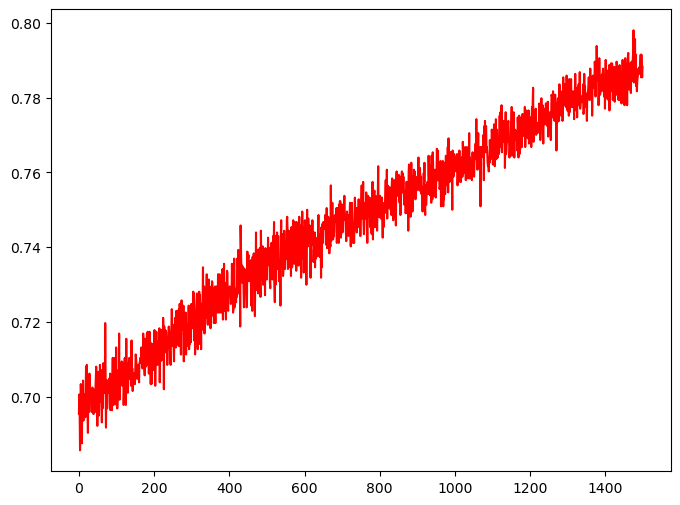

In [17]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 使用相同的 history 對象
plot_accuracy(history)

In [ ]:
test=pd.read_excel("01test.xlsx")

feature_ex = ['手機螢幕溫度(平均)', '手機背蓋溫度(平均)', '充電時間指標', '手機電池電量', 'CPU跑分階級', '上網頻率指標', '通話頻率指標', '內容容量比率']
test_data = test[feature_ex].to_numpy()

test_data=data_normalized(test_data)
test_data=data_standardized(test_data)
test_data=data_normalized(test_data)
test_data=data_standardized(test_data)

pca=PCA(n_components=6)
test_data_pca=pca.fit(test_data).transform(test_data)
test_data=test_data_pca
print(test_data)

In [ ]:
predicted_ans = model.predict(test_data)
print(np.mean(predicted_ans))
predicted_classes = (predicted_ans > 0.5).astype(int)


print(predicted_classes .shape)

if predicted_classes .ndim > 1:
    predicted_classes  = predicted_classes .squeeze()
print(predicted_classes .shape)

In [ ]:
my_submission = pd.DataFrame({'id': test.id, 'Underclocking': predicted_classes })
my_submission.to_csv('submision_67_7472.csv', index=False)

In [ ]:
#model-cross 
def create_model(input_dim):
    l2_regularizer = tf.keras.regularizers.l2(0.001)
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_features,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),   
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



from sklearn.model_selection import cross_validate, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = []
input_dim = x_data.shape[1]  # 获取输入特征的数量

for train_index, test_index in kf.split(x_data):
    # 分割数据
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    # 创建模型
    model = create_model(input_dim)
    
    # 训练模型
    model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=1)
    
    # 评估模型
    score = model.evaluate(x_test, y_test, verbose=0)
    scores.append(score[1])  # 假设我们关心的是准确率

# 打印每折的准确率以及平均准确率
print("每折的准确率:", scores)
print("平均准确率:", np.mean(scores))

In [ ]:
from tensorflow.keras.regularizers import l2
def build_model(n_layers, input_dim, regularization_rate=0.01, dropout_rate=0.001):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_regularizer=l2(regularization_rate)))
    for _ in range(n_layers - 1):
        model.add(Dense(64 // _ if 64 // _ > 4 else 4, activation='relu', kernel_regularizer=l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test, epochs=50):
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    return history


In [ ]:
input_dim = x_data.shape[1]  # 假設x_data已經定義並準備好了
regularization_rate = 0.01
dropout_rate = 0.001
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

max_layers = 20  # 嘗試的最大層數
results = {}

for n_layers in range(1, max_layers + 1):
    model = build_model(n_layers, input_dim, regularization_rate, dropout_rate)
    history = evaluate_model(model, x_train, y_train, x_test, y_test)
    accuracy = np.max(history.history['val_accuracy'])  # 取最好的驗證準確率
    results[n_layers] = accuracy
    print(f"Tested {n_layers} layers: Validation Accuracy = {accuracy:.4f}")

# 找到最佳層數
best_layers = max(results, key=results.get)
print(f"Best number of layers: {best_layers} with Accuracy: {results[best_layers]:.4f}")
